<a href="https://colab.research.google.com/github/AnaClaudiaMessias/Fairness_ML/blob/main/Fairness_em_Aprendizado_de_M%C3%A1quina_vi%C3%A9s_racial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando biblotecas e dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [ ]:
# Caminho para o arquivo CSV no Google Drive
caminho_arquivo_csv = '/content/drive/MyDrive/ic2/PNAD 2014/pnad.pes_2014.csv'

# Abrir o arquivo CSV usando o pandas
df = pd.read_csv(caminho_arquivo_csv, delimiter='\t')

# Exibir o DataFrame
print(df.columns)

Index(['V0101', 'UF', 'V0102', 'V0103', 'V0301', 'V0302', 'V3031', 'V3032',
       'V3033', 'V8005',
       ...
       'V31087', 'V31088', 'V31089', 'V31090', 'V31091', 'V31092', 'V31093',
       'V31094', 'V9993', 'domicilioid'],
      dtype='object', length=459)


## Tratando os dados

In [ ]:
# 2 == branca
# 4 == preta
# 6 == amarela
# 8 == parda
# 0 == indigena
# 9 == sem_declaracao

# transformar variável dependente em binária
df['V0404'] = df['V0404'].replace({2: 1, 6: 1, 4: 0, 8: 0, 9:None})

#df['renda binaria'] =
df.loc[df['V4718'] <= 1980, 'renda binaria'] = 0
#df['renda binaria'] =
df.loc[df['V4718'] > 1980, 'renda binaria'] = 1

# Exibir o DataFrame
dados = ['V0404', 'V4706', 'V4707', 'V4718', 'V6007','V8005', 'V4809', 'V4810', 'renda binaria']

# Exibir o DataFrame tratado
print(df[dados].head(16))

    V0404  V4706  V4707   V4718  V6007  V8005  V4809  V4810  renda binaria
0     0.0    1.0    3.0  1500.0    4.0     27    7.0    8.0            0.0
1     1.0    NaN    NaN     NaN    5.0     28    NaN    NaN            NaN
2     1.0    NaN    NaN     NaN    NaN      1    NaN    NaN            NaN
3     1.0    1.0    4.0  1200.0    2.0     51    5.0    6.0            0.0
4     1.0    1.0    4.0  1100.0    4.0     43    5.0    6.0            0.0
5     1.0    NaN    NaN     NaN    1.0     77    NaN    NaN            NaN
6     1.0    NaN    NaN     NaN    5.0     39    NaN    NaN            NaN
7     1.0   10.0    3.0  7000.0    1.0     60    2.0    1.0            1.0
8     1.0    4.0    2.0  1500.0    NaN     16   12.0    4.0            0.0
9     1.0    NaN    NaN     NaN    NaN     15    NaN    NaN            NaN
10    1.0    NaN    NaN     NaN    NaN     12    NaN    NaN            NaN
11    0.0    NaN    NaN     NaN    1.0     68    NaN    NaN            NaN
12    0.0    4.0    2.0  

In [ ]:
# tratar os dados

# fazer drop NaN para não ter dado nulo
df = df[dados].dropna()

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Normalizar as duas colunas
df[dados] = scaler.fit_transform(df[dados])

# Exibir o DataFrame tratado
print(df[dados].head(16))

    V0404     V4706  V4707     V4718     V6007     V8005     V4809     V4810  \
0     0.0  0.000000   0.50  0.005000  0.250000  0.154545  0.500000  0.777778   
3     1.0  0.000000   0.75  0.004000  0.083333  0.372727  0.333333  0.555556   
4     1.0  0.000000   0.75  0.003667  0.250000  0.300000  0.333333  0.555556   
7     1.0  0.750000   0.50  0.023333  0.000000  0.454545  0.083333  0.000000   
15    0.0  0.250000   0.50  0.003000  0.000000  0.454545  0.250000  0.777778   
16    0.0  0.666667   0.25  0.002667  0.000000  0.436364  0.333333  0.555556   
17    1.0  0.166667   0.25  0.006667  0.083333  0.409091  0.583333  0.333333   
18    1.0  0.166667   0.50  0.011667  0.583333  0.454545  0.583333  0.333333   
19    1.0  0.166667   0.25  0.011667  0.583333  0.209091  0.583333  0.888889   
20    1.0  0.000000   0.50  0.005000  0.333333  0.209091  0.333333  0.555556   
21    1.0  0.166667   0.50  0.016667  0.583333  0.172727  0.583333  0.222222   
22    1.0  0.750000   0.50  0.005333  0.

In [ ]:
#race = df['V0404']
# job_position = df['V4706']
# weekly_working_hours = df['V4707']
# income = df['V4718']
# highest_education_level = df['V6007']
# age = df['V8005']
# main_company_activity = df['V4809']
# work_area = df['V4810']

In [ ]:
# Separar as variáveis independentes (atributos) e a variável dependente (target)
X = df[dados].drop(['V4718', 'renda binaria'], axis=1)
y = df[dados]['renda binaria']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_priv = X_test[X_test['V0404']==1]
y_test_priv = y_test[X_test['V0404']==1]
X_test_despriv = X_test[X_test['V0404']==0]
y_test_despriv = y_test[X_test['V0404']==0]

print(X_test_priv)
print(y_test_priv)

        V0404     V4706  V4707     V6007     V8005     V4809     V4810
311388    1.0  0.166667   0.25  0.583333  0.227273  0.666667  0.111111
51570     1.0  0.666667   0.25  0.000000  0.481818  0.500000  0.777778
131892    1.0  0.000000   0.50  0.333333  0.109091  0.333333  0.333333
13604     1.0  0.000000   1.00  0.333333  0.290909  0.416667  0.444444
295388    1.0  1.000000   0.00  0.500000  0.527273  0.333333  0.555556
...       ...       ...    ...       ...       ...       ...       ...
353859    1.0  0.166667   0.50  0.666667  0.345455  0.583333  0.111111
272865    1.0  0.000000   0.75  0.333333  0.227273  0.500000  0.777778
312158    1.0  0.000000   0.50  0.333333  0.318182  0.416667  0.555556
214548    1.0  0.000000   0.25  0.583333  0.209091  0.666667  0.111111
352926    1.0  0.000000   0.25  0.333333  0.318182  0.916667  0.444444

[13323 rows x 7 columns]
311388    1.0
51570     1.0
131892    0.0
13604     0.0
295388    0.0
         ... 
353859    1.0
272865    1.0
312158    

## Criar e treinar modelos

In [ ]:
# Criar os modelos
regressao_logistica = LogisticRegression()
gradiente_boosting = GradientBoostingClassifier()

# Treinar os modelos usando os dados de treinamento
regressao_logistica.fit(X_train, y_train)
gradiente_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

## Grupo privilegiado



*  regressao_logistica



Acurácia do modelo regressao_logistica: 0.78
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      8971
         1.0       0.72      0.54      0.62      4352

    accuracy                           0.78     13323
   macro avg       0.76      0.72      0.73     13323
weighted avg       0.77      0.78      0.77     13323



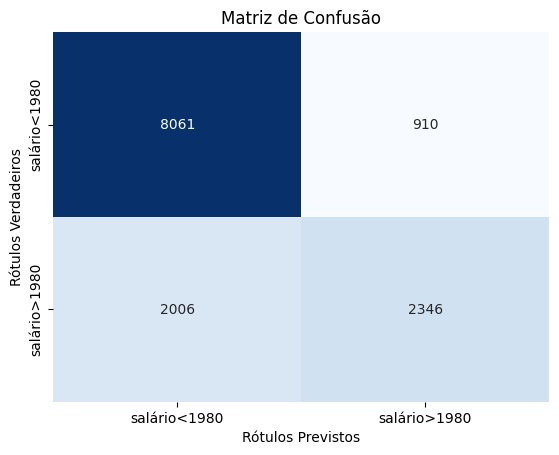

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = regressao_logistica.predict(X_test_priv)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_regressao_logistica = accuracy_score(y_test_priv, y_pred_regressao_logistica)
print(f'Acurácia do modelo regressao_logistica: {acuracia_regressao_logistica:.2f}')
print(classification_report(y_test_priv, y_pred_regressao_logistica ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_regressao_logistica)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



*   gradiente_boosting



Acurácia do modelo: 0.82
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      8971
         1.0       0.77      0.63      0.69      4352

    accuracy                           0.82     13323
   macro avg       0.80      0.77      0.78     13323
weighted avg       0.81      0.82      0.81     13323



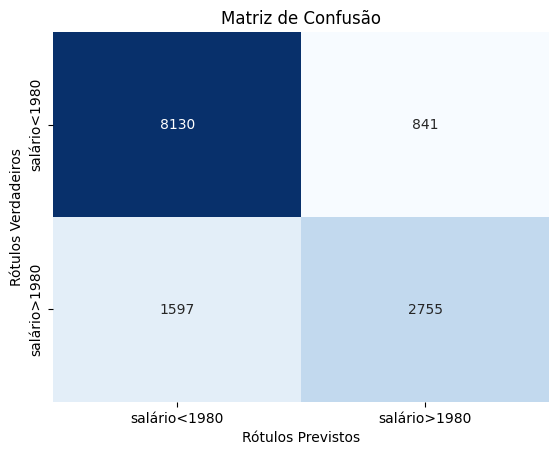

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_gradiente_boosting  = gradiente_boosting.predict(X_test_priv)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_gradiente_boosting = accuracy_score(y_test_priv, y_pred_gradiente_boosting )
print(f'Acurácia do modelo: {acuracia_gradiente_boosting:.2f}')
print(classification_report(y_test_priv, y_pred_gradiente_boosting ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_gradiente_boosting)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

## Grupo Desprivilegiado



*  regressao_logistica



Acurácia do modelo regressao_logistica: 0.85
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     13975
         1.0       0.57      0.20      0.30      2631

    accuracy                           0.85     16606
   macro avg       0.72      0.59      0.61     16606
weighted avg       0.82      0.85      0.82     16606



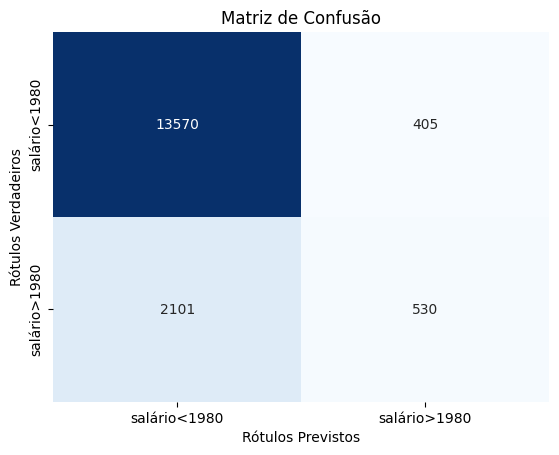

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = regressao_logistica.predict(X_test_despriv)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_regressao_logistica = accuracy_score(y_test_despriv, y_pred_regressao_logistica)
print(f'Acurácia do modelo regressao_logistica: {acuracia_regressao_logistica:.2f}')
print(classification_report(y_test_despriv, y_pred_regressao_logistica ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_despriv, y_pred_regressao_logistica)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



*   gradiente_boosting



Acurácia do modelo: 0.88
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     13975
         1.0       0.72      0.39      0.51      2631

    accuracy                           0.88     16606
   macro avg       0.81      0.68      0.72     16606
weighted avg       0.87      0.88      0.86     16606



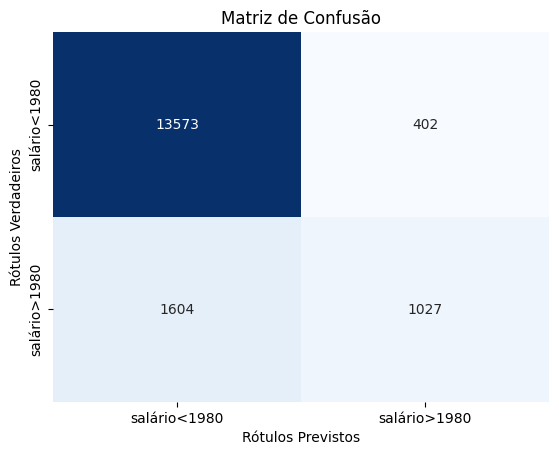

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_gradiente_boosting  = gradiente_boosting.predict(X_test_despriv)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_gradiente_boosting = accuracy_score(y_test_despriv, y_pred_gradiente_boosting )
print(f'Acurácia do modelo: {acuracia_gradiente_boosting:.2f}')
print(classification_report(y_test_despriv, y_pred_gradiente_boosting ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_despriv, y_pred_gradiente_boosting)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

## Invertendo Manualmente o Valor dos Dados

In [ ]:
X_priv_invert = X_test_priv.replace({0: 1})
X_despriv_invert=X_test_despriv.replace({1: 0})

## Grupo privilegiado $→$ Grupo Desprivilegiado



*  regressao_logistica



Acurácia do modelo regressao_logistica: 0.68
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      8971
         1.0       0.52      0.49      0.50      4352

    accuracy                           0.68     13323
   macro avg       0.64      0.63      0.63     13323
weighted avg       0.68      0.68      0.68     13323



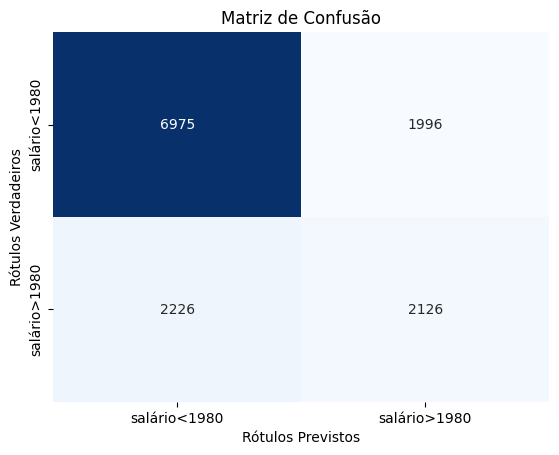

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = regressao_logistica.predict(X_priv_invert)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_regressao_logistica = accuracy_score(y_test_priv, y_pred_regressao_logistica)
print(f'Acurácia do modelo regressao_logistica: {acuracia_regressao_logistica:.2f}')
print(classification_report(y_test_priv, y_pred_regressao_logistica ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_regressao_logistica)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



*   gradiente_boosting



Acurácia do modelo: 0.77
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      8971
         1.0       0.75      0.43      0.55      4352

    accuracy                           0.77     13323
   macro avg       0.76      0.68      0.70     13323
weighted avg       0.77      0.77      0.75     13323



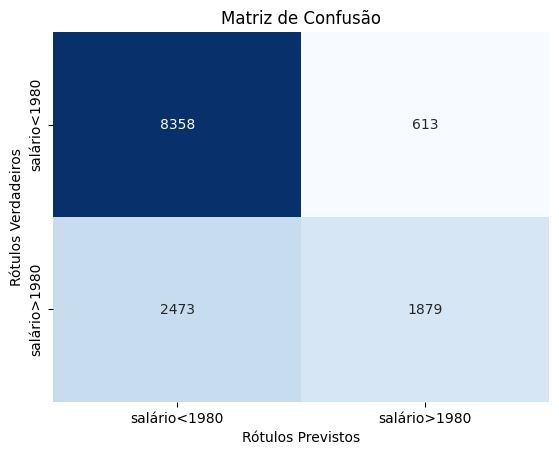

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_gradiente_boosting  = gradiente_boosting.predict(X_priv_invert)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_gradiente_boosting = accuracy_score(y_test_priv, y_pred_gradiente_boosting )
print(f'Acurácia do modelo: {acuracia_gradiente_boosting:.2f}')
print(classification_report(y_test_priv, y_pred_gradiente_boosting ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_gradiente_boosting)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

## Grupo Desprivilegiado $→$ Grupo Privilegiado



*  regressao_logistica



Acurácia do modelo regressao_logistica: 0.85
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     13975
         1.0       0.56      0.14      0.22      2631

    accuracy                           0.85     16606
   macro avg       0.71      0.56      0.57     16606
weighted avg       0.81      0.85      0.81     16606



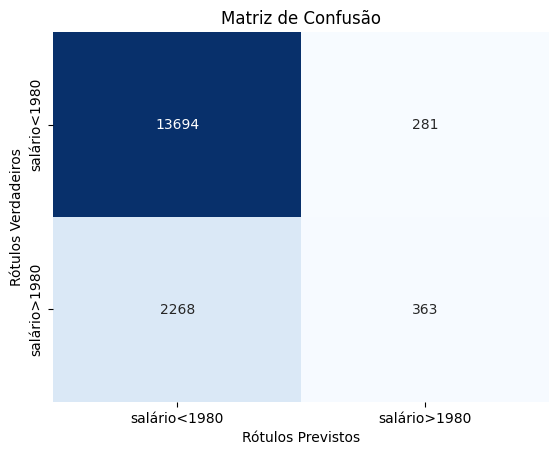

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = regressao_logistica.predict(X_despriv_invert)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_regressao_logistica = accuracy_score(y_test_despriv, y_pred_regressao_logistica)
print(f'Acurácia do modelo regressao_logistica: {acuracia_regressao_logistica:.2f}')
print(classification_report(y_test_despriv, y_pred_regressao_logistica ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_despriv, y_pred_regressao_logistica)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



*   gradiente_boosting



Acurácia do modelo: 0.88
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     13975
         1.0       0.73      0.35      0.48      2631

    accuracy                           0.88     16606
   macro avg       0.81      0.66      0.70     16606
weighted avg       0.86      0.88      0.86     16606



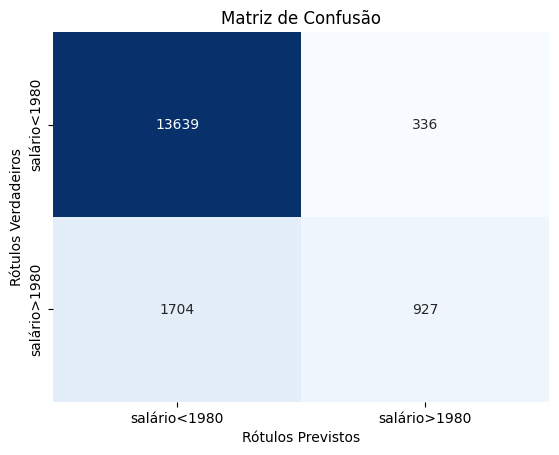

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_gradiente_boosting  = gradiente_boosting.predict(X_despriv_invert)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_gradiente_boosting = accuracy_score(y_test_despriv, y_pred_gradiente_boosting )
print(f'Acurácia do modelo: {acuracia_gradiente_boosting:.2f}')
print(classification_report(y_test_despriv, y_pred_gradiente_boosting ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_despriv, y_pred_gradiente_boosting)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



## Métricas de Fairness


In [ ]:
pip install fairlearn



*   Taxa de Decisões Corretas Igualitárias (Equalized Odds)




In [ ]:
from fairlearn.metrics import equalized_odds_difference

# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = regressao_logistica.predict(X_test)
y_pred_gradiente_boosting  = gradiente_boosting.predict(X_test)

# Calcule a métrica Equalized Odds
eod_regressao_logistica = equalized_odds_difference(y_test, y_pred_regressao_logistica, sensitive_features=X_test['V0404'])
eod_gradiente_boosting = equalized_odds_difference(y_test, y_pred_gradiente_boosting, sensitive_features=X_test['V0404'])

print(f'Diferença de Equalized Odds Regressao logistica: {eod_regressao_logistica:.4f}')
print(f'Diferença de Equalized Odds Gradiente boosting: {eod_gradiente_boosting:.4f}')


Diferença de Equalized Odds Regressao logistica: 0.3376
Diferença de Equalized Odds Gradiente boosting: 0.2427




*   Igualdade de Oportunidade (Equal Opportunity)





In [ ]:
import numpy as np

# Calculando a taxa de verdadeiros positivos (TPR) para o grupo protegido (a=1)
TP_privilegiado = np.sum((y_test == 1) & (y_pred_regressao_logistica == 1) & (X_test['V0404'] == 1))
FN_privilegiado = np.sum((y_test == 1) & (y_pred_regressao_logistica == 0) & (X_test['V0404'] == 1))
TPR_privilegiado = TP_privilegiado / (TP_privilegiado + FN_privilegiado)

# Calculando a taxa de verdadeiros positivos (TPR) para o grupo não protegido (a=0)
TP_nao_privilegiado = np.sum((y_test == 1) & (y_pred_regressao_logistica == 1) & (X_test['V0404'] == 0))
FN_nao_privilegiado = np.sum((y_test == 1) & (y_pred_regressao_logistica == 0) & (X_test['V0404'] == 0))
TPR_nao_privilegiado = TP_nao_privilegiado / (TP_nao_privilegiado + FN_nao_privilegiado)

# Calculando a diferença na TPR entre os grupos
equal_opportunity_regressao_logistica = TPR_privilegiado - TPR_nao_privilegiado

print(f'Diferença de Equal Opportunity Regressao logistica: {equal_opportunity_regressao_logistica:.4f}')


Diferença de Equal Opportunity Regressao logistica: 0.3376


In [ ]:
# Suponha que você tenha as previsões (y_pred), os rótulos verdadeiros (y_true) e o atributo protegido (por exemplo, grupo demográfico) 'a' (0 ou 1)

# Calcule a taxa de verdadeiros positivos (TPR) para o grupo protegido (a=1)
TP_privilegiado = np.sum((y_test == 1) & (y_pred_gradiente_boosting == 1) & (X_test['V0404'] == 1))
FN_privilegiado = np.sum((y_test == 1) & (y_pred_gradiente_boosting == 0) & (X_test['V0404'] == 1))
TPR_privilegiado = TP_privilegiado / (TP_privilegiado + FN_privilegiado)

# Calcule a taxa de verdadeiros positivos (TPR) para o grupo não protegido (a=0)
TP_nao_privilegiado = np.sum((y_test == 1) & (y_pred_gradiente_boosting == 1) & (X_test['V0404'] == 0))
FN_nao_privilegiado = np.sum((y_test == 1) & (y_pred_gradiente_boosting == 0) & (X_test['V0404'] == 0))
TPR_nao_privilegiado = TP_nao_privilegiado / (TP_nao_privilegiado + FN_nao_privilegiado)

# Calcule a diferença na TPR entre os grupos
equal_opportunity_gradiente_boosting = TPR_privilegiado - TPR_nao_privilegiado

print(f'Diferença de Equal Opportunity Gradiente Boosting: {equal_opportunity_gradiente_boosting:.4f}')

Diferença de Equal Opportunity Gradiente Boosting: 0.2427




*   Diferença de Paridade Demográfica ou paridade estatística (Demographic Parity)



In [ ]:
# Importando as bibliotecas necessárias
from fairlearn.metrics import demographic_parity_difference
import numpy as np

# Calcule a métrica Demographic Parity
dp_diff_regressao_logistica = demographic_parity_difference(y_test, y_pred_regressao_logistica, sensitive_features=X_test['V0404'])
dp_diff_gradiente_boosting = demographic_parity_difference(y_test, y_pred_gradiente_boosting, sensitive_features=X_test['V0404'])

print(f'Diferença de Paridade Demográfica Regressao logistica: {dp_diff_regressao_logistica:.4f}')
print(f'Diferença de Paridade Demográfica Gradiente Boosting: {dp_diff_gradiente_boosting:.4f}')

Diferença de Paridade Demográfica Regressao logistica: 0.1881
Diferença de Paridade Demográfica Gradiente Boosting: 0.1839


## Mitigando viés

In [ ]:
print(type(regressao_logistica))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import DemographicParity

mitigator_regressao_logistica = ExponentiatedGradient(estimator=regressao_logistica, constraints=DemographicParity())
mitigator_regressao_logistica.fit(X_train, y_train, sensitive_features=X_train['V0404'])
y_pred_mitigated_regressao_logistica = mitigator_regressao_logistica.predict(X_test)

mitigator_gradiente_boosting = ExponentiatedGradient(estimator=gradiente_boosting, constraints=DemographicParity())
mitigator_gradiente_boosting.fit(X_train, y_train, sensitive_features=X_train['V0404'])
y_pred_mitigated_gradiente_boosting = mitigator_gradiente_boosting.predict(X_test)

# Calcule a métrica Demographic Parity
mitigated_dp_diff_regressao_logistica = demographic_parity_difference(y_test, y_pred_mitigated_regressao_logistica, sensitive_features=X_test['V0404'])
mitigated_dp_diff_gradiente_boosting = demographic_parity_difference(y_test, y_pred_mitigated_gradiente_boosting, sensitive_features=X_test['V0404'])

print(f'Diferença de Paridade Demográfica Regressao logistica: {mitigated_dp_diff_regressao_logistica:.4f}')
print(f'Diferença de Paridade Demográfica Gradiente Boosting: {mitigated_dp_diff_gradiente_boosting:.4f}')

Diferença de Paridade Demográfica Regressao logistica: 0.0105
Diferença de Paridade Demográfica Gradiente Boosting: 0.0190


# Refazendo as classificações após mitigar viés

## Grupo privilegiado



*  regressao_logistica



Acurácia do modelo regressao_logistica: 0.74
              precision    recall  f1-score   support

         0.0       0.74      0.96      0.83      8971
         1.0       0.79      0.29      0.42      4352

    accuracy                           0.74     13323
   macro avg       0.76      0.62      0.63     13323
weighted avg       0.75      0.74      0.70     13323



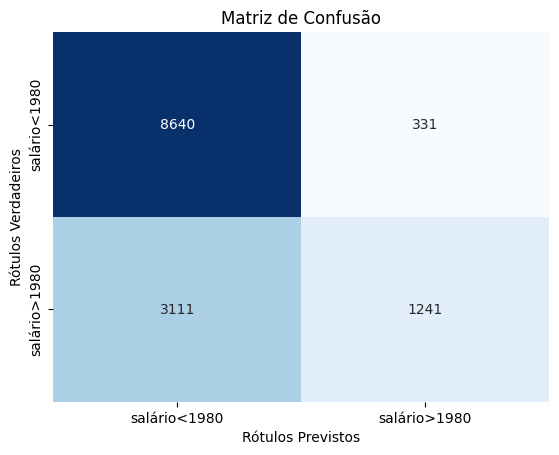

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = mitigator_regressao_logistica.predict(X_test_priv)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_regressao_logistica = accuracy_score(y_test_priv, y_pred_regressao_logistica)
print(f'Acurácia do modelo regressao_logistica: {acuracia_regressao_logistica:.2f}')
print(classification_report(y_test_priv, y_pred_regressao_logistica ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_regressao_logistica)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



*   gradiente_boosting



Acurácia do modelo: 0.79
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      8971
         1.0       0.86      0.42      0.56      4352

    accuracy                           0.79     13323
   macro avg       0.81      0.69      0.71     13323
weighted avg       0.80      0.79      0.76     13323



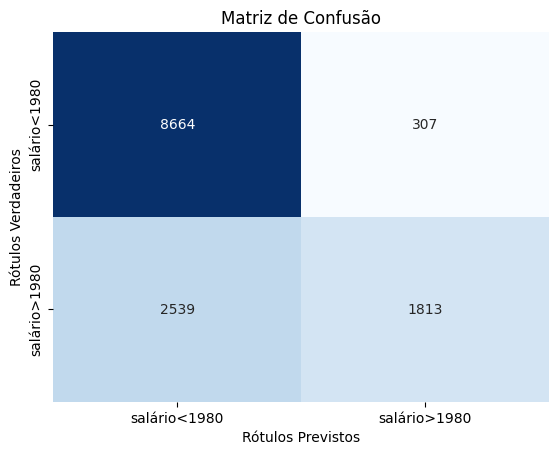

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_gradiente_boosting  = mitigator_gradiente_boosting.predict(X_test_priv)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_gradiente_boosting = accuracy_score(y_test_priv, y_pred_gradiente_boosting )
print(f'Acurácia do modelo: {acuracia_gradiente_boosting:.2f}')
print(classification_report(y_test_priv, y_pred_gradiente_boosting ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_gradiente_boosting)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

## Invertendo Manualmente o Valor dos Dados

In [ ]:
X_priv_invert = X_test_priv.replace({0: 1})
X_despriv_invert=X_test_despriv.replace({1: 0})

## Grupo privilegiado $→$ Grupo Desprivilegiado



*  regressao_logistica



Acurácia do modelo regressao_logistica: 0.66
              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77      8971
         1.0       0.47      0.27      0.35      4352

    accuracy                           0.66     13323
   macro avg       0.59      0.56      0.56     13323
weighted avg       0.63      0.66      0.63     13323



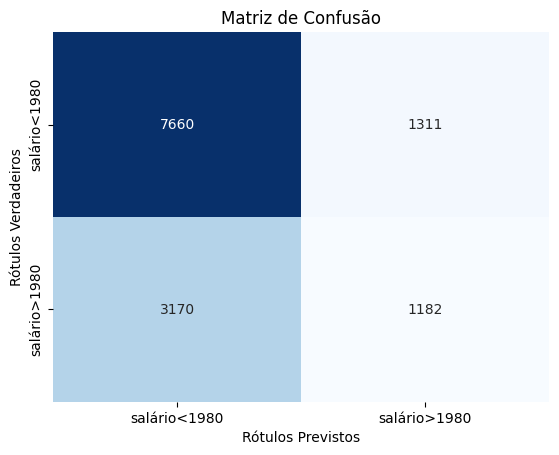

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_regressao_logistica = mitigator_regressao_logistica.predict(X_priv_invert)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_regressao_logistica = accuracy_score(y_test_priv, y_pred_regressao_logistica)
print(f'Acurácia do modelo regressao_logistica: {acuracia_regressao_logistica:.2f}')
print(classification_report(y_test_priv, y_pred_regressao_logistica ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_regressao_logistica)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()



*   gradiente_boosting



Acurácia do modelo: 0.75
              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84      8971
         1.0       0.84      0.29      0.43      4352

    accuracy                           0.75     13323
   macro avg       0.79      0.63      0.64     13323
weighted avg       0.77      0.75      0.71     13323



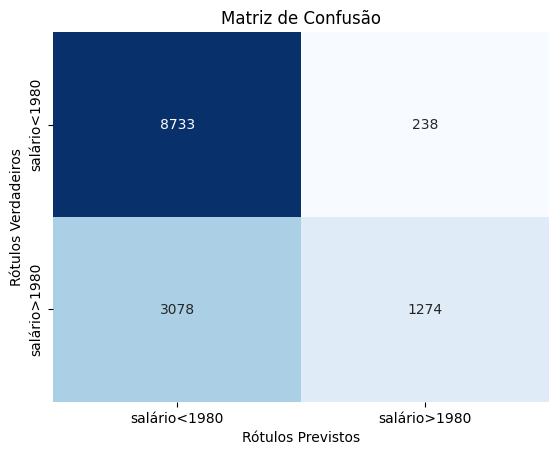

In [ ]:
# Fazer previsões usando os dados de teste
y_pred_gradiente_boosting  = mitigator_gradiente_boosting.predict(X_priv_invert)

# Calcular a acurácia do modelo e imprimir o relatório de classificação
acuracia_gradiente_boosting = accuracy_score(y_test_priv, y_pred_gradiente_boosting )
print(f'Acurácia do modelo: {acuracia_gradiente_boosting:.2f}')
print(classification_report(y_test_priv, y_pred_gradiente_boosting ))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_priv, y_pred_gradiente_boosting)

# Criar a matriz de confusão decorada usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['salário<1980', 'salário>1980'],
            yticklabels=['salário<1980', 'salário>1980'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()